In [2]:
import cv2
from matplotlib import pyplot as plt
import glob
import numpy as np
from math import floor

In [3]:
# pct 3 (V >= 0.4) & (0.2 < S < 0.6) & (0 < H < 25 | 335 < H <= 360)
# tradus fct 1 = 0.4 * 255
# tradus fct 1 = 0.2 * 255
# tradus fct 1 = 0.6 * 255
# tradus fct 1 = 25 * 0.5
# tradus fct 1 = 335 * 0.2
# tradus fct 1 = 360 * 0.2



In [4]:
def imread(path):
    return cv2.imread(path)[:,:,::-1]

In [5]:
images = []
for img_path in glob.glob('*.jpg'):
    images.append(imread(img_path))

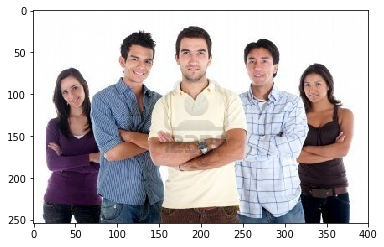

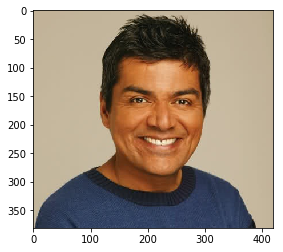

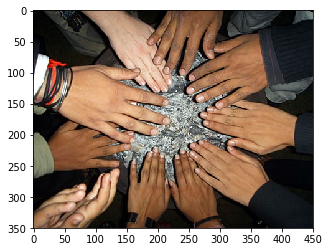

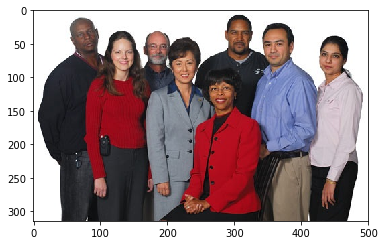

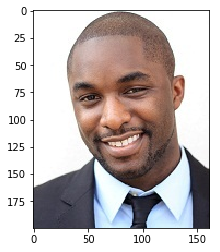

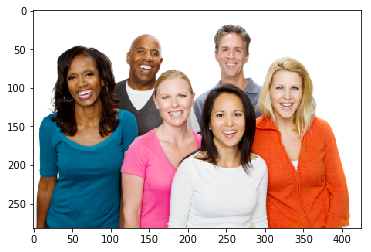

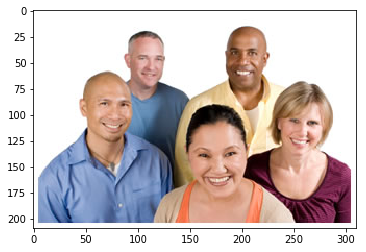

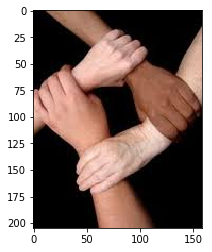

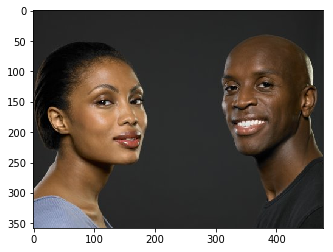

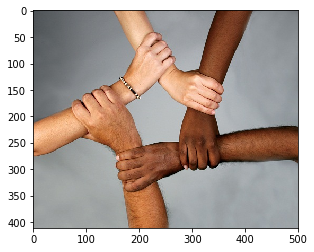

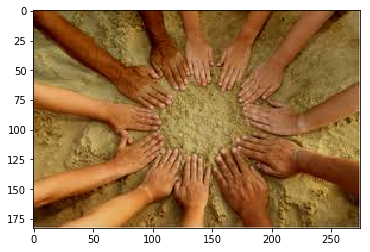

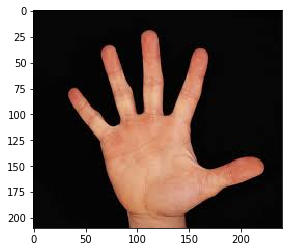

In [6]:
for ima in images:
    plt.figure()
    plt.imshow(ima)

In [7]:
def avg(img, avg_function, **kwargs):
    newImage = img.copy()
    for i in range(0,img.shape[0]): # Change
        for j in range(0,img.shape[1]): # Change
            pixel = img[i,j]
            newImage[i,j] = avg_function(pixel, **kwargs)
    return newImage

1.

In [8]:
def avg_function_1(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return (R + G + B) / 3

2.

In [9]:
def avg_function_2_1(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return 0.3*R + 0.59*G + 0.11*B
def avg_function_2_2(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return 0.2126*R + 0.7152*G + 0.0722*B
def avg_function_2_3(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return 0.299*R + 0.587*G + 0.114*B

3.

In [10]:
def avg_function_3(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return (min(R, G, B) + max(R, G, B)) / 2

4.

In [11]:
def avg_function_4_1(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return max(R, G, B)


def avg_function_4_2(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return min(R, G, B)

5.

In [12]:
def avg_function_5_1(a):
    R = int(a[0])
    return R
def avg_function_5_2(a):
    G = int(a[1])
    return G
def avg_function_5_3(a):
    B = int(a[2])
    return B

6.

In [13]:
def avg_function_6(a, **kwargs):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])

    nr_intervals = kwargs['interval']

    val = (R + G + B) / 3

    interval = 255 / nr_intervals

    intervals = np.arange(0, 255, interval)
    filter_intervals = np.where(intervals <= val)
    val_after = intervals[filter_intervals[-1]][-1] + interval / 2
    return val_after

7.

In [14]:
def apply_threshold(value):
        return 0 if value < 128 else 255

def floyd_steinberg_dithering(img):
    new_img = img.copy()
    x_lim, y_lim, _ = new_img.shape
    
    for y in range(1, y_lim):
        for x in range(1, x_lim):
            old_pixel = avg_function_1(new_img[x, y])
            new_pixel = apply_threshold(old_pixel)
            new_img[x, y] = new_pixel
            error = old_pixel - new_pixel

            if x < x_lim - 1:
                gray = new_img[x + 1, y] + round(error * 7 / 16)
                new_img[x + 1, y] = gray

            if x > 1 and y < y_lim - 1:
                gray = new_img[x - 1, y + 1] + round(error * 3 / 16)
                new_img[x - 1, y + 1] = gray

            if y < y_lim - 1:
                gray = new_img[x, y + 1] + round(error * 5 / 16)
                new_img[x, y + 1] = gray

            if x < x_lim - 1 and y < y_lim - 1:
                gray = new_img[x + 1, y + 1] + round(error * 1 / 16)
                new_img[x + 1, y + 1] = gray
                
    return new_img

In [15]:
np.arange(0, 255, 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250])

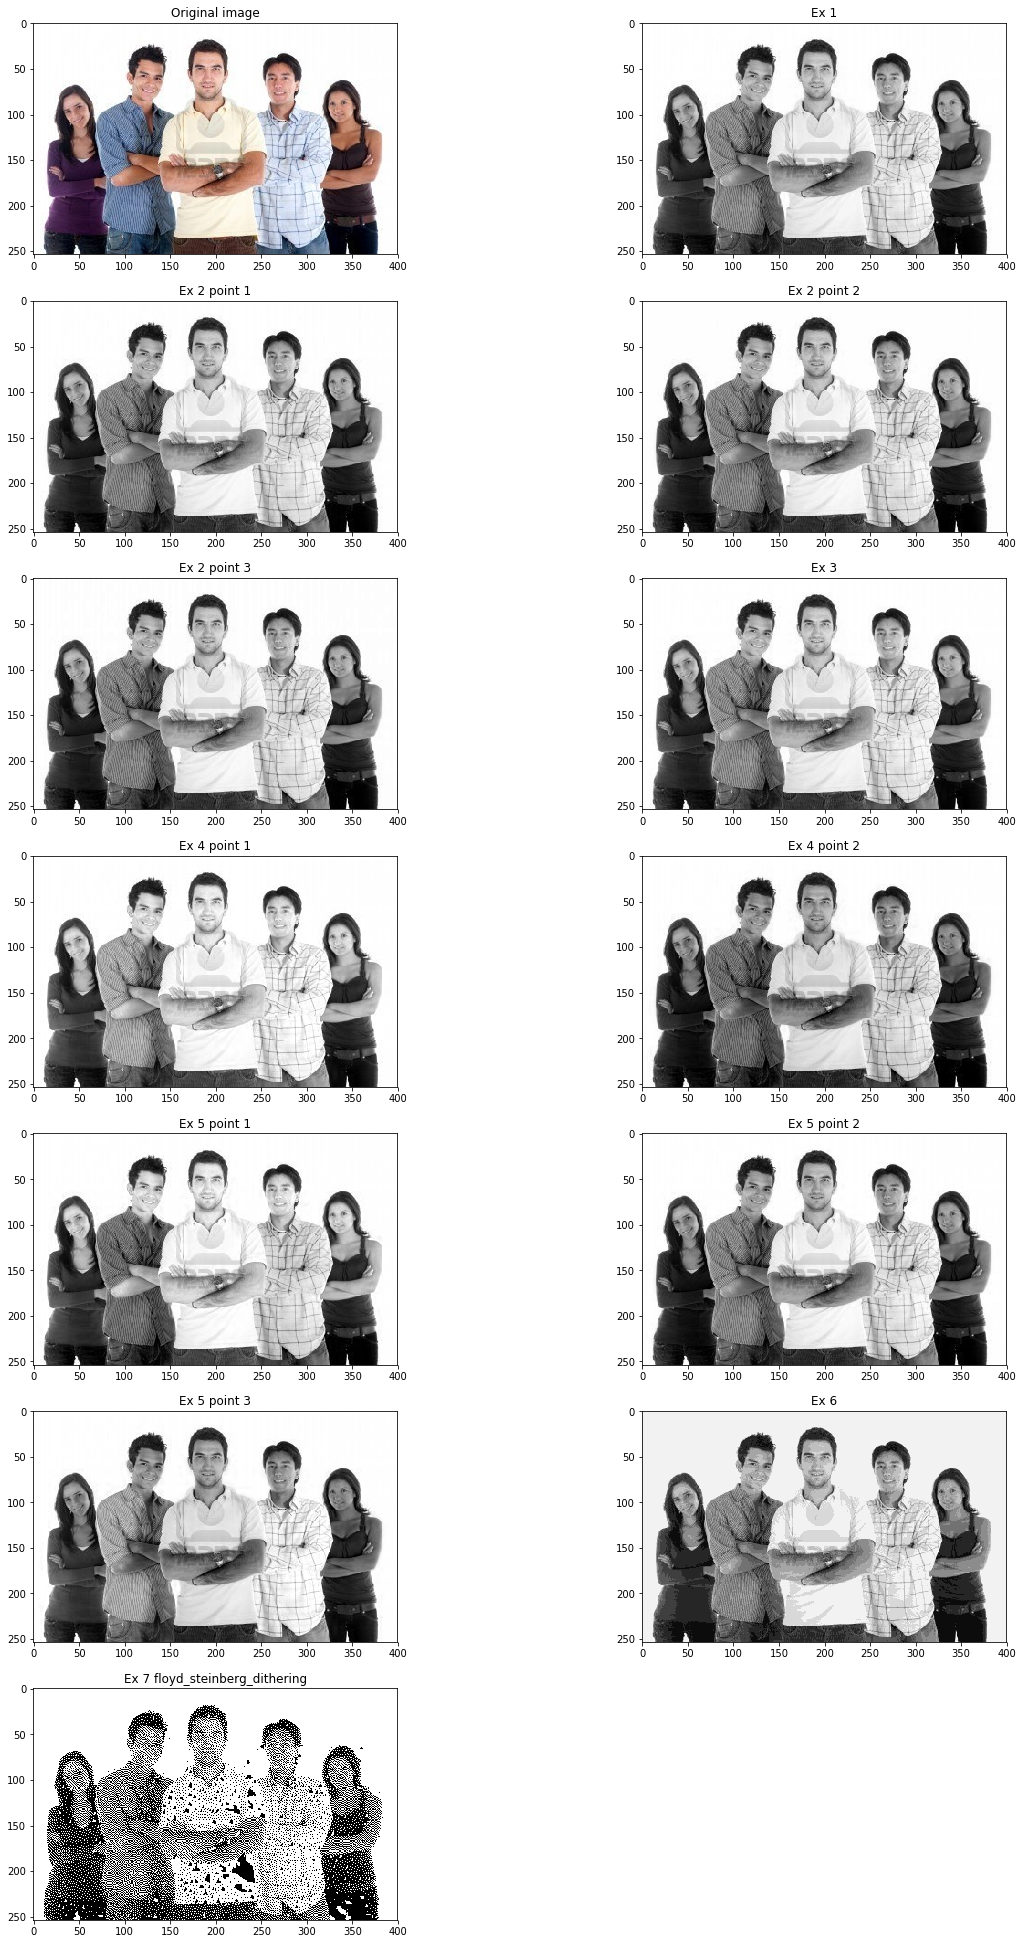

In [21]:
for img in images[:1]:
    fig=plt.figure(figsize=(20, 40))
    
    fig0 = fig.add_subplot(8, 2, 1)
    fig0.title.set_text('Original image')
    plt.imshow(img)
    img1 = avg(img, avg_function=avg_function_1)
    
    
    img2 = avg(img, avg_function=avg_function_2_1)
    img3 = avg(img, avg_function=avg_function_2_2)
    img4 = avg(img, avg_function=avg_function_2_3)
    
    
    img5 = avg(img, avg_function=avg_function_3)
    
    img6 = avg(img, avg_function=avg_function_4_1)
    img7 = avg(img, avg_function=avg_function_4_2)
    
    img8 = avg(img, avg_function=avg_function_5_1)
    img9 = avg(img, avg_function=avg_function_5_2)
    img10 = avg(img, avg_function=avg_function_5_3)
    
    img11 = avg(img, avg_function=avg_function_6, interval=10)
    img12 = floyd_steinberg_dithering(img)
    
    fig1 = fig.add_subplot(8, 2, 2)
    fig1.title.set_text('Ex 1')
    plt.imshow(img1)
    
    fig2 = fig.add_subplot(8, 2, 3)
    fig2.title.set_text('Ex 2 point 1')
    plt.imshow(img2)
    
    fig3 = fig.add_subplot(8, 2, 4)
    fig3.title.set_text('Ex 2 point 2')
    plt.imshow(img3)
    
    fig4 = fig.add_subplot(8, 2, 5)
    
    fig4.title.set_text('Ex 2 point 3')
    plt.imshow(img4)
    
    fig5 = fig.add_subplot(8, 2, 6)
    fig5.title.set_text('Ex 3')
    plt.imshow(img5)
    
    fig6 = fig.add_subplot(8, 2, 7)
    fig6.title.set_text('Ex 4 point 1')
    plt.imshow(img6)
    
    fig7 = fig.add_subplot(8, 2, 8)
    fig7.title.set_text('Ex 4 point 2')
    plt.imshow(img7)
    
    fig8 = fig.add_subplot(8, 2, 9)
    fig8.title.set_text('Ex 5 point 1')
    plt.imshow(img8)
    
    fig9 = fig.add_subplot(8, 2, 10)
    fig9.title.set_text('Ex 5 point 2')
    plt.imshow(img9)
    
    fig10 = fig.add_subplot(8, 2, 11)
    fig10.title.set_text('Ex 5 point 3')
    plt.imshow(img10)
    
    fig11 = fig.add_subplot(8, 2, 12)
    fig11.title.set_text('Ex 6')
    plt.imshow(img11)
    
    fig12 = fig.add_subplot(8, 2, 13)
    fig12.title.set_text('Ex 7 floyd_steinberg_dithering')
    plt.imshow(img12)
plt.show()    
    
    

In [17]:
images[0].shape

(254, 400, 3)